# Projeto de Simulação de Monte Carlo para Previsão de Preços
Este projeto tem como objetivo comparar o uso de simulações de Monte Carlo para prever os preços de Bitcoin (BTC-USD) e outras grandes ações.

# Bibliotecas Necessárias
Para executar este projeto, você precisará das seguintes bibliotecas Python:

Python



```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
```


# Funções Implementadas
1. ```calcular_retornos_logaritmicos(historico)```

  Calcula os retornos logarítmicos de uma série temporal de preços.


2. ```simular_monte_carlo(historico, simulacoes=1000, periodo=252)```

  Realiza simulações de Monte Carlo para uma série temporal de preços.

3. ```plotar_simulacoes(simulacoes_df, titulo='Simulações de Monte Carlo', xlabel='Dias de negociação', ylabel='Preço simulado')```

  Gera um gráfico das simulações de Monte Carlo.

4. ```rodar_simulacao_monte_carlo(ticker, start_date, end_date, simulacoes=1000, periodo=252)```

  Executa a simulação de Monte Carlo para um determinado ativo.

5. ```calcular_mape(valores_reais, valores_previstos)```

  Calcula o Erro Percentual Absoluto Médio (MAPE) entre valores reais e valores previstos.

#Como Executar
1. **Baixar os Dados**: Utilize a função ```yf.download``` da biblioteca ```yfinance``` para baixar os dados históricos dos ativos desejados.
2. **Rodar Simulações**: Utilize a função ```rodar_simulacao_monte_carlo``` para executar as simulações de Monte Carlo.
3. **Plotar Resultados**: Utilize a função ```plotar_simulacoes``` para visualizar os resultados das simulações.
4. **Calcular MAPE**: Utilize a função ```calcular_mape``` para calcular o Erro Percentual Absoluto Médio entre os valores reais e previstos.

# Exemplo de Uso
## Simulação para Bitcoin (BTC-USD)

### 1. Obter o gráfico da simulação Monte Carlo
```
# Executando a simulação
historico, simulacoes_df = rodar_simulacao_monte_carlo('BTC-USD', '2021-09-19', '2023-09-19')
```

### 2. Obter a MAPE da simulaçao com dados posteriores
```
# Comparando com os valores reais para o novo intervalo
valores_reais_novo = yf.download('BTC-USD', start='2023-09-19', end='2024-09-19')['Close'].dropna().values

# Pegando os valores previstos da simulação
valores_previstos = simulacoes_df.iloc[:, 0].values[1:]  # Usando a primeira simulação

# Ajuste o tamanho dos arrays para que sejam do mesmo tamanho
min_len = min(len(valores_reais_novo), len(valores_previstos))
valores_reais_novo = valores_reais_novo[:min_len]
valores_previstos = valores_previstos[:min_len]

# Calculando o MAPE com os valores ajustados
mape_simulacao = calcular_mape(valores_reais_novo, valores_previstos)
print(f"\nO MAPE da simulação é: {mape_simulacao:.2f}%")
```


## Dependências

In [175]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [180]:
def calcular_retornos_logaritmicos(historico):
    """Calcula os retornos logarítmicos de uma série temporal de preços"""
    retornos_log = np.log(historico / historico.shift(1)).dropna()
    return retornos_log

def simular_monte_carlo(historico, simulacoes=1000, periodo=252):
    """Realiza simulações de Monte Carlo para uma série temporal"""
    retornos_log = calcular_retornos_logaritmicos(historico)

    media_retorno_log = retornos_log.mean()
    desvio_padrao_retorno_log = retornos_log.std()

    drift = media_retorno_log - (0.5 * desvio_padrao_retorno_log**2)

    simulacoes_resultados = []

    for i in range(simulacoes):
        simulacao = [historico.iloc[-1]]
        for j in range(periodo):
            retorno = np.random.normal(0, desvio_padrao_retorno_log)
            valor_novo = simulacao[-1] * np.exp(drift + retorno)
            simulacao.append(valor_novo)
        simulacoes_resultados.append(simulacao)

    return pd.DataFrame(simulacoes_resultados).T

def plotar_simulacoes(simulacoes_df, titulo='Simulações de Monte Carlo', xlabel='Dias de negociação', ylabel='Preço simulado'):
    """Gera um gráfico das simulações de Monte Carlo"""
    plt.figure(figsize=(10, 6))
    plt.plot(simulacoes_df, color='blue', alpha=0.1)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def rodar_simulacao_monte_carlo(ticker, start_date, end_date, simulacoes=1000, periodo=252):
    """Executa a simulação de Monte Carlo para um determinado ativo"""
    dados = yf.download(ticker, start=start_date, end=end_date)
    historico = dados['Close'].dropna()

    simulacoes_df = simular_monte_carlo(historico, simulacoes=simulacoes, periodo=periodo)

    plotar_simulacoes(simulacoes_df,
                      titulo=f'Simulações de Monte Carlo - {ticker}',
                      xlabel='Dias de negociação',
                      ylabel='Preço simulado')

    return historico, simulacoes_df

def calcular_mape(valores_reais, valores_previstos):
    """Calcula o Erro Percentual Absoluto Médio (MAPE) entre valores reais e valores previstos"""
    valores_reais = np.array(valores_reais)
    valores_previstos = np.array(valores_previstos)

    if np.any(valores_reais == 0):
        raise ValueError("Os valores reais não podem conter zeros.")

    mape = np.mean(np.abs((valores_reais - valores_previstos) / valores_reais)) * 100
    return mape

## 1. BTC-USD

[*********************100%***********************]  1 of 1 completed


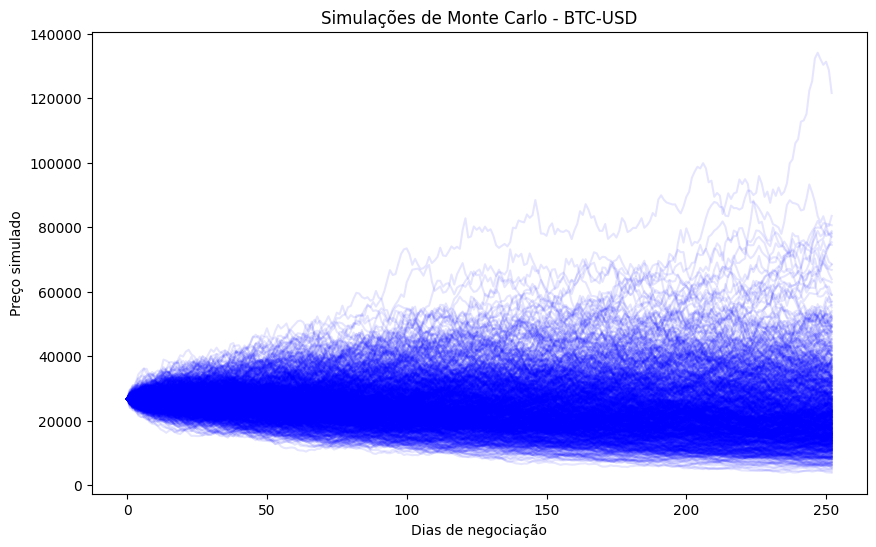

In [181]:
# Execução simulação Monte Carlo do BTC-USD
historico, simulacoes_df = rodar_simulacao_monte_carlo('BTC-USD', '2021-09-19', '2023-09-19')


In [182]:
# Comparando com os valores reais para o novo intervalo
valores_reais_novo = yf.download('BTC-USD', start='2023-09-19', end='2024-09-19')['Close'].dropna().values

# Pegando os valores previstos da simulação
valores_previstos = simulacoes_df.iloc[:, 0].values[1:]  # Usando a primeira simulação

# Ajuste o tamanho dos arrays para que sejam do mesmo tamanho
min_len = min(len(valores_reais_novo), len(valores_previstos))
valores_reais_novo = valores_reais_novo[:min_len]
valores_previstos = valores_previstos[:min_len]

# Calculando o MAPE com os valores ajustados
mape_simulacao = calcular_mape(valores_reais_novo, valores_previstos)
print(f"\nO MAPE da simulação é: {mape_simulacao:.2f}%")

[*********************100%***********************]  1 of 1 completed


O MAPE da simulação é: 32.37%


## 2. VALE3.SA

[*********************100%***********************]  1 of 1 completed


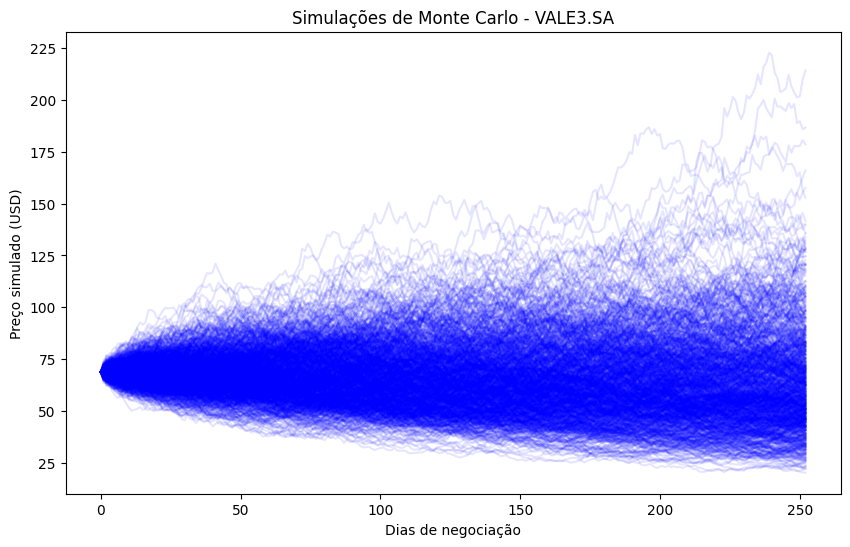

In [145]:
# Execução simulação Monte Carlo da VALE3.SA
historico, simulacoes_df = rodar_simulacao_monte_carlo('VALE3.SA', '2021-09-19', '2023-09-19')

In [147]:
# Comparando com os valores reais para o novo intervalo
valores_reais_novo = yf.download('VALE3.SA', start='2023-09-19', end='2024-09-19')['Close'].dropna().values

# Pegando os valores previstos da simulação
valores_previstos = simulacoes_df.iloc[:, 0].values[1:]  # Usando a primeira simulação

# Ajuste o tamanho dos arrays para que sejam do mesmo tamanho
min_len = min(len(valores_reais_novo), len(valores_previstos))
valores_reais_novo = valores_reais_novo[:min_len]
valores_previstos = valores_previstos[:min_len]

# Calculando o MAPE com os valores ajustados
mape_simulacao = calcular_mape(valores_reais_novo, valores_previstos)
print(f"\nO MAPE da simulação é: {mape_simulacao:.2f}%")

[*********************100%***********************]  1 of 1 completed


O MAPE da simulação é: 13.13%


## 3. PETR4.SA


[*********************100%***********************]  1 of 1 completed


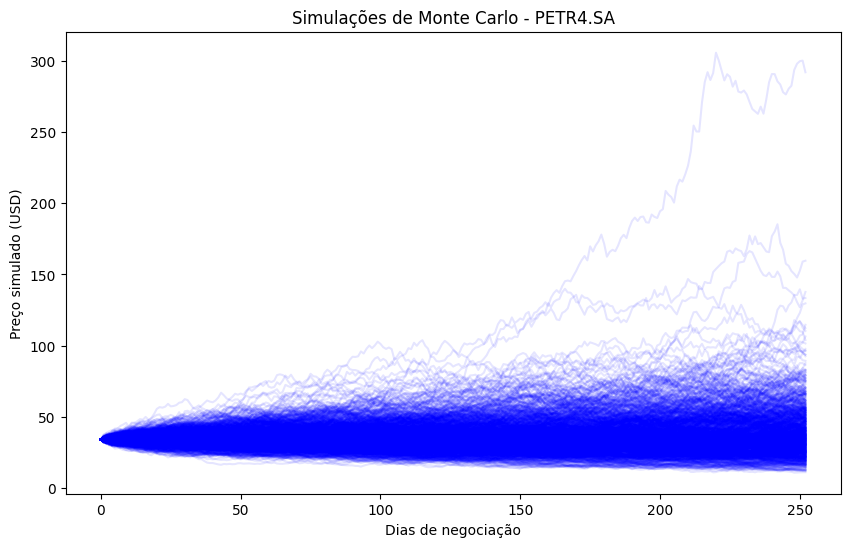

In [148]:
# Execução simulação Monte Carlo da PETR4.SA
historico, simulacoes_df = rodar_simulacao_monte_carlo('PETR4.SA', '2021-09-19', '2023-09-19')

In [149]:
# Comparando com os valores reais para o novo intervalo
valores_reais_novo = yf.download('PETR4.SA', start='2023-09-19', end='2024-09-19')['Close'].dropna().values

# Pegando os valores previstos da simulação
valores_previstos = simulacoes_df.iloc[:, 0].values[1:]  # Usando a primeira simulação

# Ajuste o tamanho dos arrays para que sejam do mesmo tamanho
min_len = min(len(valores_reais_novo), len(valores_previstos))
valores_reais_novo = valores_reais_novo[:min_len]
valores_previstos = valores_previstos[:min_len]

# Calculando o MAPE com os valores ajustados
mape_simulacao = calcular_mape(valores_reais_novo, valores_previstos)
print(f"\nO MAPE da simulação é: {mape_simulacao:.2f}%")

[*********************100%***********************]  1 of 1 completed


O MAPE da simulação é: 18.42%


## 4. ITUB3.SA

[*********************100%***********************]  1 of 1 completed


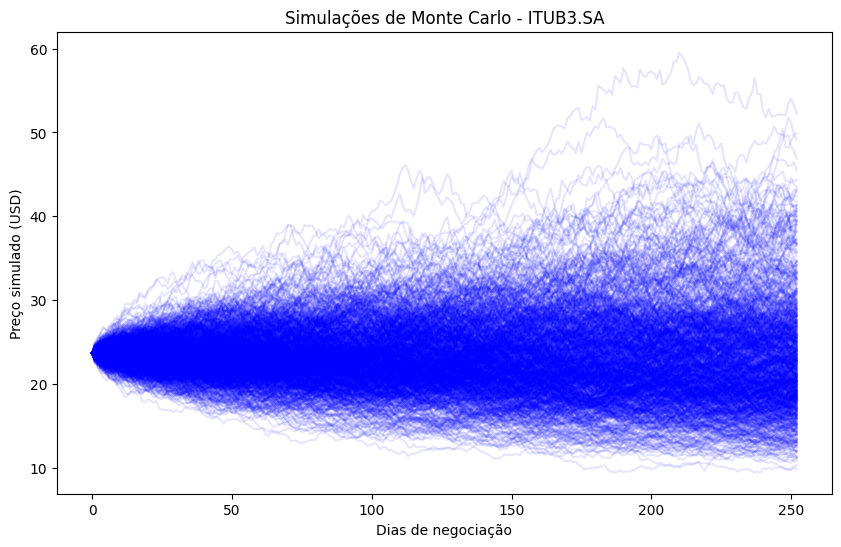

In [159]:
# Execução simulação Monte Carlo da ITUB3.SA
historico, simulacoes_df = rodar_simulacao_monte_carlo('ITUB3.SA', '2021-09-19', '2023-09-19')

In [160]:
# Comparando com os valores reais para o novo intervalo
valores_reais_novo = yf.download('ITUB3.SA', start='2023-09-19', end='2024-09-19')['Close'].dropna().values

# Pegando os valores previstos da simulação
valores_previstos = simulacoes_df.iloc[:, 0].values[1:]  # Usando a primeira simulação

# Ajuste o tamanho dos arrays para que sejam do mesmo tamanho
min_len = min(len(valores_reais_novo), len(valores_previstos))
valores_reais_novo = valores_reais_novo[:min_len]
valores_previstos = valores_previstos[:min_len]

# Calculando o MAPE com os valores ajustados
mape_simulacao = calcular_mape(valores_reais_novo, valores_previstos)
print(f"\nO MAPE da simulação é: {mape_simulacao:.2f}%")

[*********************100%***********************]  1 of 1 completed


O MAPE da simulação é: 21.53%


## Conclusão

1. Bitcoin (BTC-USD): A simulação do preço do Bitcoin mostra uma grande dispersão ao longo do tempo, refletindo a alta volatilidade da criptomoeda. O MAPE de 32,37% indica que o modelo teve dificuldades em prever com precisão os preços, o que é esperado devido à natureza especulativa e volátil do Bitcoin.

2. VALE3.SA: A simulação da VALE3.SA apresenta uma dispersão menor e um comportamento mais estável em comparação com o Bitcoin. Com um MAPE de 13,13%, o modelo foi capaz de capturar com mais precisão as flutuações dos preços das ações da Vale, provavelmente devido à natureza mais previsível do setor e das ações da empresa.

3. PETR4.SA: A simulação da Petrobras mostra uma dispersão moderada, com alguns cenários extremos no longo prazo. O MAPE de 18,42% sugere que o modelo foi relativamente preciso, mas há uma incerteza maior em relação às flutuações, especialmente devido à sensibilidade dos preços do petróleo e fatores políticos.

4. ITUB3.SA: Embora o gráfico desta ação não esteja incluído aqui, o MAPE de 21,53% sugere que o modelo teve uma precisão razoável na previsão dos preços das ações do Itaú, que possuem volatilidade menor do que o Bitcoin, mas ainda estão sujeitos às variações do setor financeiro.

###Conclusão Geral:
As simulações de Monte Carlo tiveram melhor desempenho em prever os preços de ações de grandes empresas (VALE, PETR, ITUB) do que em criptomoedas (BTC), o que é evidenciado pelos menores valores de MAPE para as ações. O alto MAPE do Bitcoin reflete a dificuldade de prever mercados altamente voláteis.